# Baseline model: Africa data
- Import excel file, add date column and export it as json
- Use json file
- Data formatting: column names. 
- Encode event_type and sub_event_type
- Aggregate by month. Working dataset for ML
- Function to plot specific country

In [1]:
# African dataset
# https://www.acleddata.com/curated-data-files/

In [2]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LogisticRegression

In [109]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Exporting excel file as json

In [ ]:
# # import excel file
# df = pd.read_excel('../data/Africa_1997-2019_Oct12-1.xlsx')

In [ ]:
# # New column for date & month
# df['date'] = pd.to_datetime(df['EVENT_DATE']).dt.date

In [ ]:
# # export dataframe as json
# df.to_json('../data/africa-data.json')

## Importing data

In [3]:
df = pd.read_json('../data/africa-data.json')

In [4]:
df.shape

(193565, 30)

In [ ]:
# df.head()

## Data formatting
- Rename columns
- Encode values
- Define classification according to event/fatalities?

In [5]:
# Rename and remove columns
columns = ['YEAR', 'EVENT_TYPE', 'SUB_EVENT_TYPE', 'ACTOR1', 'REGION', 'COUNTRY', 'SOURCE', 'FATALITIES', 'date']
try:
    df = df[columns]
    df.columns = ['year', 'event_type', 'sub_event_type', 'actor', 'region', 'country', 'source', 'fatalities', 'date']
except KeyError as e:
    print(e)
    pass

print(df.columns)
print(df.shape)

Index(['year', 'event_type', 'sub_event_type', 'actor', 'region', 'country',
       'source', 'fatalities', 'date'],
      dtype='object')
(193565, 9)


In [ ]:
# Encode event_types and sub_event_types
# https://www.datacamp.com/community/tutorials/categorical-data

In [6]:
print('**Categorical values**\n')
print('{} event types:\n {}\n'.format(df.event_type.nunique(), df.event_type.unique()))
print('{} sub_event types:\n {}\n'.format(df.sub_event_type.nunique(), df.sub_event_type.unique()))
print('{} actors:\n {}\n'.format(df.actor.nunique(), df.actor.unique()))

**Categorical values**

6 event types:
 ['Violence against civilians' 'Explosions/Remote violence'
 'Strategic developments' 'Battles' 'Protests' 'Riots']

25 sub_event types:
 ['Attack' 'Remote explosive/landmine/IED' 'Abduction/forced disappearance'
 'Non-violent transfer of territory' 'Armed clash'
 'Looting/property destruction' 'Headquarters or base established'
 'Peaceful protest' 'Non-state actor overtakes territory'
 'Government regains territory' 'Protest with intervention'
 'Change to group/activity' 'Mob violence' 'Violent demonstration'
 'Sexual violence' 'Arrests' 'Air/drone strike'
 'Shelling/artillery/missile attack' 'Disrupted weapons use'
 'Excessive force against protesters' 'Agreement' 'Other' 'Grenade'
 'Suicide bomb' 'Chemical weapon']

4065 actors:
 ['GIA: Armed Islamic Group' 'GSPC: Salafist Group for Call and Combat'
 'Unidentified Armed Group (Angola)' ...
 'AFRC: Armed Forces Revolutionary Council (Advance Teams)'
 'Kakula Militia' 'Militia (Superman Faction)'

In [7]:
# Selecting labels for baseline model
labels = ['event_type','sub_event_type']
labels = df[labels]
labels.head()

,event_type,sub_event_type
0,Violence against civilians,Attack
1,Violence against civilians,Attack
10,Explosions/Remote violence,Remote explosive/landmine/IED
100,Explosions/Remote violence,Remote explosive/landmine/IED
1000,Violence against civilians,Abduction/forced disappearance


In [8]:
##### Encoding Labels

In [9]:
# Adding a boolean column for fatalities

df['fatalities_encoded'] = np.where(df['fatalities']>0, '1', '0')
df.head()

,year,event_type,sub_event_type,actor,region,country,source,fatalities,date,fatalities_encoded
0,1997,Violence against civilians,Attack,GIA: Armed Islamic Group,Northern Africa,Algeria,Algeria Watch,5,1997-01-01,1
1,1997,Violence against civilians,Attack,GIA: Armed Islamic Group,Northern Africa,Algeria,Algeria Watch,2,1997-01-02,1
10,1997,Explosions/Remote violence,Remote explosive/landmine/IED,GIA: Armed Islamic Group,Northern Africa,Algeria,Algeria Watch,20,1997-01-07,1
100,1997,Explosions/Remote violence,Remote explosive/landmine/IED,GIA: Armed Islamic Group,Northern Africa,Algeria,Algeria Watch,13,1997-08-29,1
1000,2003,Violence against civilians,Abduction/forced disappearance,GSPC: Salafist Group for Call and Combat,Northern Africa,Algeria,AFP,0,2003-03-08,0


In [10]:
# del df['fatalities_encoded']

In [11]:
# Using get_dummies for values with more than two levels

labels_encoded = pd.get_dummies(labels)

In [13]:
pd.option_context('display.max_rows', None, 'display.max_columns', None)
all_labels = pd.concat([labels, labels_encoded], axis=1, sort=False)
# all_labels.iloc[2]

In [14]:
df = pd.concat([df, labels_encoded], axis = 1, sort = False)
df.iloc[1]

year                                                                        1997
event_type                                            Violence against civilians
sub_event_type                                                            Attack
actor                                                   GIA: Armed Islamic Group
region                                                           Northern Africa
country                                                                  Algeria
source                                                             Algeria Watch
fatalities                                                                     2
date                                                         1997-01-02 00:00:00
fatalities_encoded                                                             1
event_type_Battles                                                             0
event_type_Explosions/Remote violence                                          0
event_type_Protests         

## Function: Plot data for a specific country
- Resample all data by year
- Reshape all data to plot it as background
- Filter data by specific country, aggregate by year. 
- Plot data by specific country by year, with all the others for reference

In [15]:
# Basic summary data for all data
all_data = df.groupby(['date'])['event_type'].count()
all_data_year = all_data.resample('Y').sum()
all_data_year.index = pd.to_datetime(all_data_year.index)

In [16]:
all_data_year.index

DatetimeIndex(['1997-12-31', '1998-12-31', '1999-12-31', '2000-12-31',
               '2001-12-31', '2002-12-31', '2003-12-31', '2004-12-31',
               '2005-12-31', '2006-12-31', '2007-12-31', '2008-12-31',
               '2009-12-31', '2010-12-31', '2011-12-31', '2012-12-31',
               '2013-12-31', '2014-12-31', '2015-12-31', '2016-12-31',
               '2017-12-31', '2018-12-31', '2019-12-31'],
              dtype='datetime64[ns]', name='date', freq='A-DEC')

In [17]:
# Pivot table to display data by country, year, sum(year)

all_countries = df.groupby(['year', 'country'])['event_type'].count().\
                reset_index(level=['year','country'])

all_countries = pd.pivot_table(all_countries, index= 'year', columns='country', values = 'event_type')


# Graph
# plt.rcParams['figure.figsize'] = (20, 10)
# all_countries.plot(subplots = False, style='-', alpha=0.3, color = 'gray')
# plt.legend().remove()

In [18]:
# print(worst_country.loc[worst_country['event_type'].idxmax()])
# # print('\n')
# # print(worst_country.loc[worst_country['event_type'].min()])
# print(worst_country.loc[worst_country['event_type'].max(level = 'year')])

In [26]:
#Function to get data for one specific country.
# Plot data in a timeline. 

def country_data(data, name_country = ""):
    global df_country
    try:
        #Query and group data by specified country
        df_country = data.query('country == "{}"'.format(name_country))      
        fatalities = df_country.groupby(['date'])['fatalities'].sum()  
        event_type = df_country.groupby(['date'])['event_type'].count()
                
        #matplotlib graph: All cases over time, rolling for country & total
        plt.rcParams['figure.figsize'] = (20, 12)        
        all_countries.plot(subplots=False, style='-', alpha=0.2, color = 'gray')
        all_countries[name_country].plot(subplots=False, style='--', linewidth = 2, alpha=1, color = 'r')
        plt.legend().remove()

        print('{} of events in {} ({} fatalities) between January 1997 and October 2019'.\
              format(df_country['event_type'].count(), name_country, df_country.fatalities.sum()))
        
        print('\n(Showing data from {} countries)'.format(all_countries.index.nunique()))
              
    except (NameError, KeyError) as e:
        print('Error {}'.format(e))
        pass


9853 of events in Egypt (14398 fatalities) between January 1997 and October 2019

(Showing data from 23 countries)


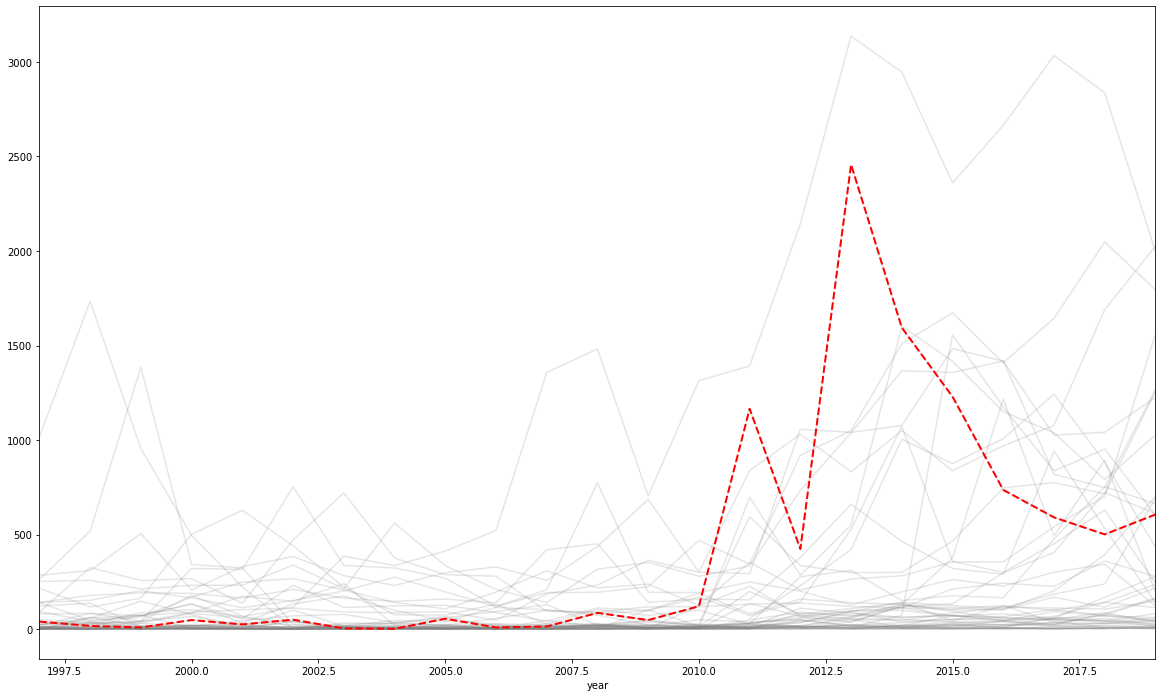

In [27]:
country_data(df, 'Egypt')

## ML models

In [28]:
# Logistic Regression, K-Clustering
# https://towardsdatascience.com/time-series-of-price-anomaly-detection-13586cd5ff46
# All data, with encoded labels: df
# All countries resampled by year, number of incidents: all_countries

In [36]:
#Check if the are any null values in data
df.isnull().values.any()
# print(df.isnull().sum())

False

In [44]:
# Include data since 2010
filtered_data = df[df.year > 2009]
filtered_data['year'].describe()

count    143354.000000
mean       2015.422067
std           2.565267
min        2010.000000
25%        2013.000000
50%        2016.000000
75%        2018.000000
max        2019.000000
Name: year, dtype: float64

## K-clustering excluding country from data

In [80]:
# Use k-clustering to detect anomalies
from sklearn.cluster import KMeans

In [78]:
# Select X values 
X = filtered_data.iloc[:,np.r_[0,7,9:41]]
X.iloc[0]

year                                                  2010
fatalities                                               2
fatalities_encoded                                       1
event_type_Battles                                       0
event_type_Explosions/Remote violence                    0
event_type_Protests                                      0
event_type_Riots                                         0
event_type_Strategic developments                        0
event_type_Violence against civilians                    1
sub_event_type_Abduction/forced disappearance            0
sub_event_type_Agreement                                 0
sub_event_type_Air/drone strike                          0
sub_event_type_Armed clash                               0
sub_event_type_Arrests                                   0
sub_event_type_Attack                                    1
sub_event_type_Change to group/activity                  0
sub_event_type_Chemical weapon                          

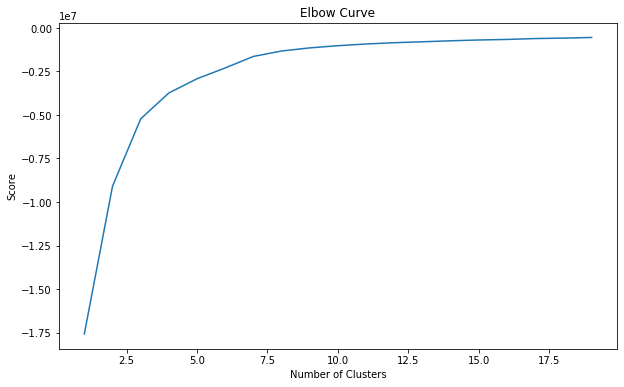

In [81]:
# Use elbow method to select number of clusters

n_cluster = range(1, 20)
kmeans = [KMeans(n_clusters=i).fit(X) for i in n_cluster]
scores = [kmeans[i].score(X) for i in range(len(kmeans))]

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(n_cluster, scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show();

In [75]:
filtered_data.shape

(143354, 41)

In [83]:
# Create clusters
n = 6
clusters = KMeans(n_clusters=n)

# Fit clusterer
clusters.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=6, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [85]:
filtered_data['group'] = clusters.predict(X)

/Users/cms/Sites/env/data/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [93]:
filtered_data.group.unique()

array([4, 3, 0, 2, 1, 5])

In [112]:
X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,year,fatalities,event_type_Battles,event_type_Explosions/Remote violence,event_type_Protests,event_type_Riots,event_type_Strategic developments,event_type_Violence against civilians,sub_event_type_Abduction/forced disappearance,sub_event_type_Agreement,sub_event_type_Air/drone strike,sub_event_type_Armed clash,sub_event_type_Arrests,sub_event_type_Attack,sub_event_type_Change to group/activity,sub_event_type_Chemical weapon,sub_event_type_Disrupted weapons use,sub_event_type_Excessive force against protesters,sub_event_type_Government regains territory,sub_event_type_Grenade,sub_event_type_Headquarters or base established,sub_event_type_Looting/property destruction,sub_event_type_Mob violence,sub_event_type_Non-state actor overtakes territory,sub_event_type_Non-violent transfer of territory,sub_event_type_Other,sub_event_type_Peaceful protest,sub_event_type_Protest with intervention,sub_event_type_Remote explosive/landmine/IED,sub_event_type_Sexual violence,sub_event_type_Shelling/artillery/missile attack,sub_event_type_Suicide bomb,sub_event_type_Violent demonstration
year,1,-0.037,-0.048,-0.019,0.059,-0.017,0.00042,0.014,0.033,0.012,0.018,-0.042,0.0012,0.0034,-0.042,0.00058,0.018,-0.0021,-0.0076,-0.046,-0.039,0.049,-0.0037,-0.03,-0.017,-0.00088,0.068,-0.01,-0.0047,-0.0045,-0.018,0.0006,-0.017
fatalities,-0.037,1,0.12,0.015,-0.098,-0.049,-0.047,0.034,-0.029,-0.012,0.022,0.11,-0.017,0.049,-0.022,-0.0016,-0.013,0.00043,0.035,-0.015,-0.0082,-0.022,-0.023,0.042,-0.015,-0.015,-0.092,-0.03,0.0007,-0.0055,-0.0052,0.048,-0.042
event_type_Battles,-0.048,0.12,1,-0.18,-0.32,-0.21,-0.15,-0.31,-0.091,-0.038,-0.089,0.95,-0.054,-0.28,-0.069,-0.0063,-0.047,-0.06,0.18,-0.066,-0.026,-0.07,-0.12,0.15,-0.046,-0.047,-0.29,-0.094,-0.11,-0.058,-0.067,-0.037,-0.17
event_type_Explosions/Remote violence,-0.019,0.015,-0.18,1,-0.18,-0.12,-0.084,-0.18,-0.051,-0.022,0.49,-0.17,-0.031,-0.16,-0.039,0.035,-0.026,-0.034,-0.033,0.36,-0.014,-0.039,-0.065,-0.027,-0.026,-0.026,-0.16,-0.053,0.61,-0.033,0.37,0.21,-0.095
event_type_Protests,0.059,-0.098,-0.32,-0.18,1,-0.21,-0.15,-0.31,-0.091,-0.039,-0.089,-0.31,-0.055,-0.28,-0.07,-0.0064,-0.047,0.19,-0.058,-0.066,-0.026,-0.07,-0.12,-0.049,-0.046,-0.047,0.9,0.29,-0.11,-0.058,-0.067,-0.037,-0.17
event_type_Riots,-0.017,-0.049,-0.21,-0.12,-0.21,1,-0.099,-0.21,-0.06,-0.025,-0.059,-0.2,-0.036,-0.19,-0.046,-0.0042,-0.031,-0.04,-0.038,-0.043,-0.017,-0.046,0.55,-0.032,-0.03,-0.031,-0.19,-0.062,-0.073,-0.038,-0.044,-0.024,0.8
event_type_Strategic developments,0.00042,-0.047,-0.15,-0.084,-0.15,-0.099,1,-0.15,-0.042,0.26,-0.041,-0.14,0.36,-0.13,0.46,-0.003,0.31,-0.028,-0.027,-0.031,0.17,0.46,-0.054,-0.023,0.31,0.31,-0.14,-0.044,-0.052,-0.027,-0.031,-0.017,-0.079
event_type_Violence against civilians,0.014,0.034,-0.31,-0.18,-0.31,-0.21,-0.15,1,0.29,-0.037,-0.086,-0.3,-0.053,0.9,-0.067,-0.0062,-0.046,-0.058,-0.057,-0.064,-0.025,-0.068,-0.11,-0.047,-0.045,-0.046,-0.28,-0.091,-0.11,0.19,-0.065,-0.036,-0.16
sub_event_type_Abduction/forced disappearance,0.033,-0.029,-0.091,-0.051,-0.091,-0.06,-0.042,0.29,1,-0.011,-0.025,-0.086,-0.015,-0.079,-0.02,-0.0018,-0.013,-0.017,-0.016,-0.019,-0.0073,-0.02,-0.033,-0.014,-0.013,-0.013,-0.082,-0.026,-0.031,-0.016,-0.019,-0.01,-0.048
sub_event_type_Agreement,0.012,-0.012,-0.038,-0.022,-0.039,-0.025,0.26,-0.037,-0.011,1,-0.011,-0.037,-0.0065,-0.034,-0.0083,-0.00076,-0.0056,-0.0072,-0.007,-0.0079,-0.0031,-0.0084,-0.014,-0.0058,-0.0055,-0.0057,-0.035,-0.011,-0.013,-0.007,-0.008,-0.0044,-0.02


In [ ]:
for i in filtered_data.group:
#     print(len(filtered_data.group == i))

# len(filtered_data[(filtered_data['group'] == 0)])

In [106]:
# plt.scatter(filtered_data.fatalities, filtered_data.date, alpha = 0.1)
# plt.scatter(group_0.date, group_0.fatalities, c='black', alpha=.3)